In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [70]:
df = pd.read_csv("Emission.csv",parse_dates=True,index_col='Year-Month')
df.head()

,CO2 Emission
Year-Month,
1973-01-01,106.363
1973-02-01,101.760
1973-03-01,110.553
1973-04-01,104.734
1973-05-01,114.897


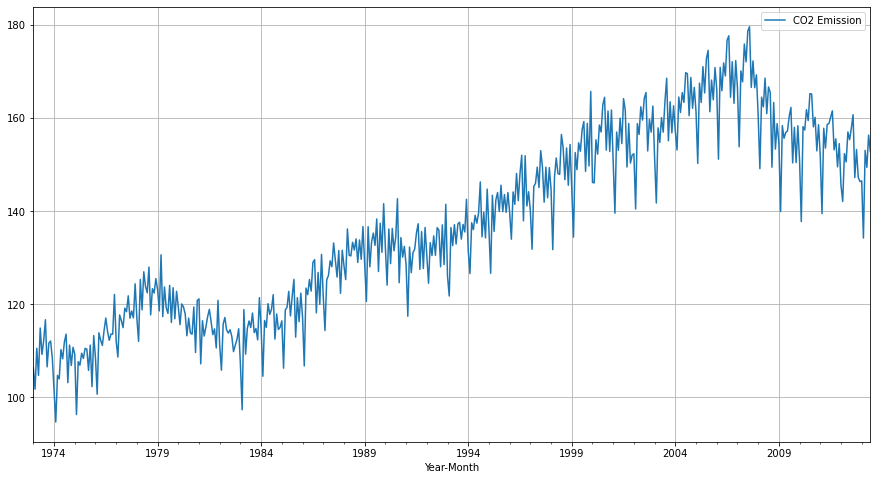

In [71]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,8
df.plot(grid=True);

In [72]:
round(df.describe(),3)

,CO2 Emission
count,486.000
mean,136.958
std,19.857
min,94.699
25%,118.778
50%,135.994
75%,154.219
max,179.659


In [85]:
train    =   df[0:int(len(df)*0.8)] 
test     =   df[int(len(df)*0.8):]

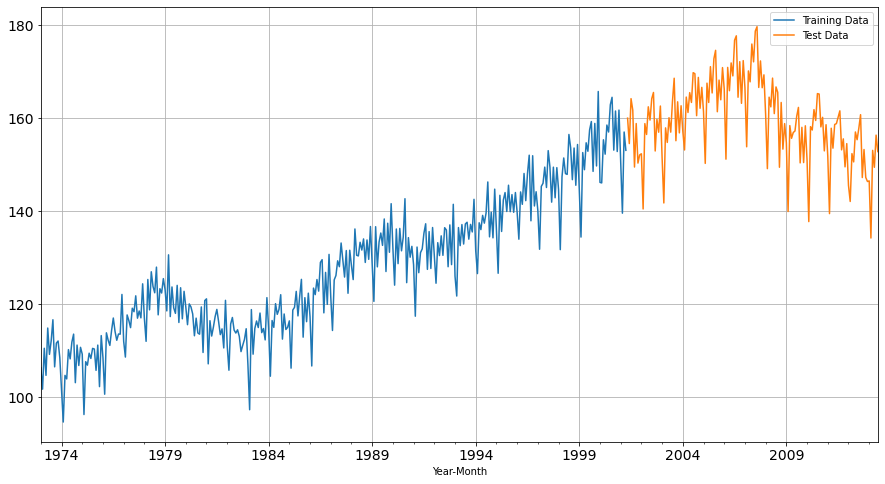

In [74]:
train['CO2 Emission'].plot(fontsize=14)
test['CO2 Emission'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

In [75]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+256 for i in range(len(test))]

print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 21

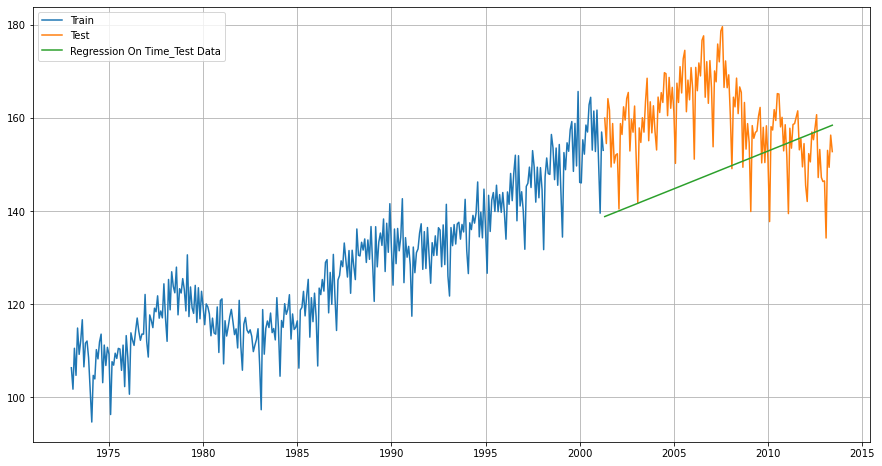

In [76]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['CO2 Emission'])

train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot( train['CO2 Emission'], label='Train')
plt.plot(test['CO2 Emission'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();



In [77]:
rmse_model1_test = metrics.mean_squared_error(test['CO2 Emission'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.872 


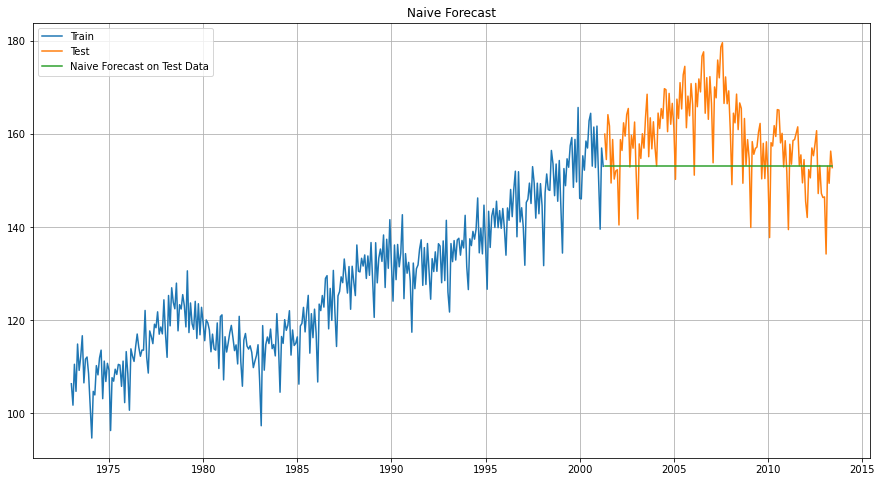

In [78]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

NaiveModel_test['naive'] = np.asarray(train['CO2 Emission'])[len(np.asarray(train['CO2 Emission']))-1]
NaiveModel_test['naive'].head()

plt.plot(NaiveModel_train['CO2 Emission'], label='Train')
plt.plot(test['CO2 Emission'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [79]:
rmse_model2_test = metrics.mean_squared_error(test['CO2 Emission'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 10.724


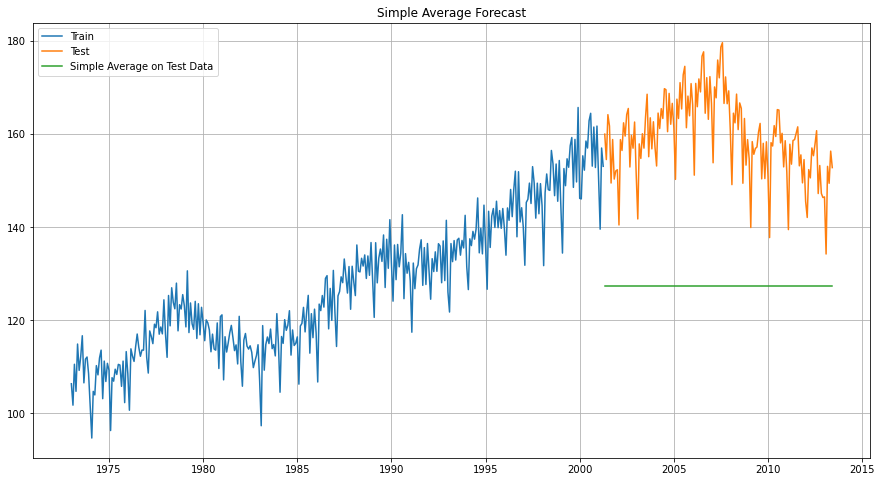

In [80]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

SimpleAverage_test['mean_forecast'] = train['CO2 Emission'].mean()
SimpleAverage_test.head()

plt.plot(SimpleAverage_train['CO2 Emission'], label='Train')
plt.plot(SimpleAverage_test['CO2 Emission'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [81]:
rmse_model3_test = metrics.mean_squared_error(test['CO2 Emission'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 33.347


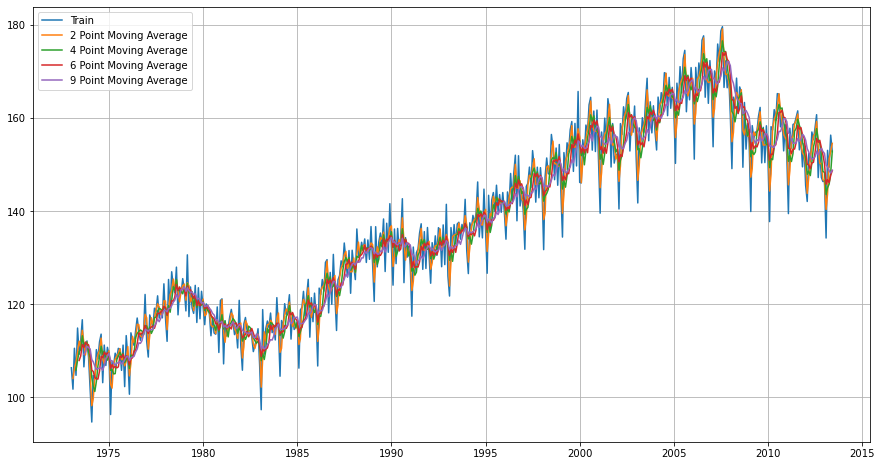

In [67]:
MovingAverage = df.copy()
MovingAverage.head()

MovingAverage['Trailing_2'] = MovingAverage['CO2 Emission'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['CO2 Emission'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['CO2 Emission'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['CO2 Emission'].rolling(9).mean()

MovingAverage.head()

## Plotting on the whole data

plt.plot(MovingAverage['CO2 Emission'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.7)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.7):]



For 2 point Moving Average Model forecast on the Training Data,  RMSE is 4.200
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 5.243
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 5.902
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 6.573


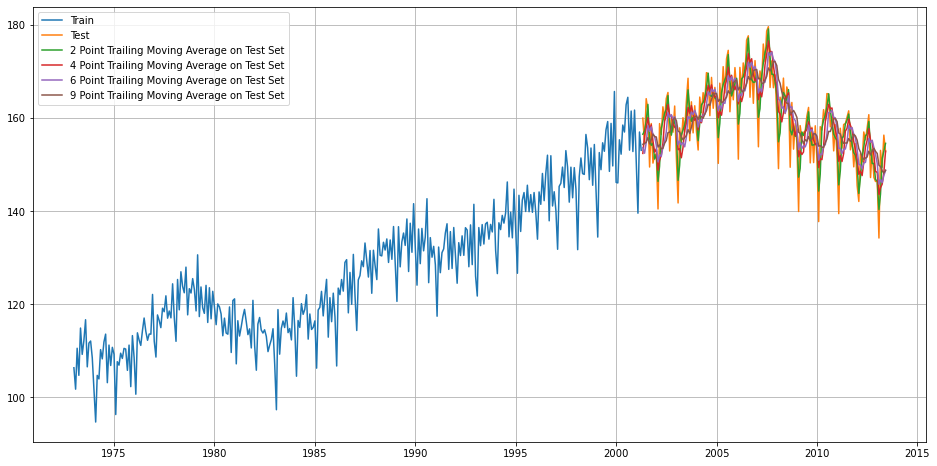

In [82]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['CO2 Emission'], label='Train')
plt.plot(trailing_MovingAverage_test['CO2 Emission'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

## Test Data - RMSE  --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['CO2 Emission'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['CO2 Emission'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['CO2 Emission'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['CO2 Emission'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

In [84]:
trailing_MovingAverage_train.head(15)

,CO2 Emission,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Year-Month,,,,,
1973-01-01,106.363,NaN,NaN,NaN,NaN
1973-02-01,101.760,104.0615,NaN,NaN,NaN
1973-03-01,110.553,106.1565,NaN,NaN,NaN
1973-04-01,104.734,107.6435,105.85250,NaN,NaN
1973-05-01,114.897,109.8155,107.98600,NaN,NaN
1973-06-01,109.240,112.0685,109.85600,107.924500,NaN
1973-07-01,112.139,110.6895,110.25250,108.887167,NaN
1973-08-01,116.683,114.4110,113.23975,111.374333,NaN
1973-09-01,106.558,111.6205,111.15500,110.708500,109.214111


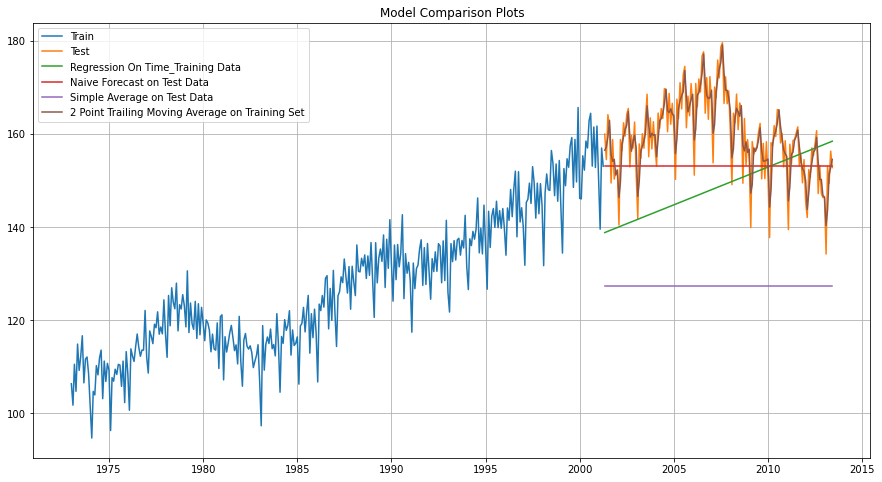

In [38]:

plt.plot(train['CO2 Emission'], label='Train')
plt.plot(test['CO2 Emission'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Training Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

In [99]:
df = pd.read_csv("Emission.csv",parse_dates=True,index_col='Year-Month')
df.head()

,CO2 Emission
Year-Month,
1973-01-01,106.363
1973-02-01,101.760
1973-03-01,110.553
1973-04-01,104.734
1973-05-01,114.897


In [100]:
df['CO2 Emission']=np.log(df['CO2 Emission'])
train    =   df[0:int(len(df)*0.8)] 
test     =   df[int(len(df)*0.8):]
df.head()

,CO2 Emission
Year-Month,
1973-01-01,4.666858
1973-02-01,4.622617
1973-03-01,4.705495
1973-04-01,4.651424
1973-05-01,4.744036


In [101]:
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')
model_SES_autofit = model_SES.fit(optimized=True)
model_SES_autofit.params

SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict



C:\Users\nswam\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


2005-05-01    5.091121
2005-06-01    5.091121
2005-07-01    5.091121
2005-08-01    5.091121
2005-09-01    5.091121
                ...   
2013-02-01    5.091121
2013-03-01    5.091121
2013-04-01    5.091121
2013-05-01    5.091121
2013-06-01    5.091121
Freq: MS, Length: 98, dtype: float64

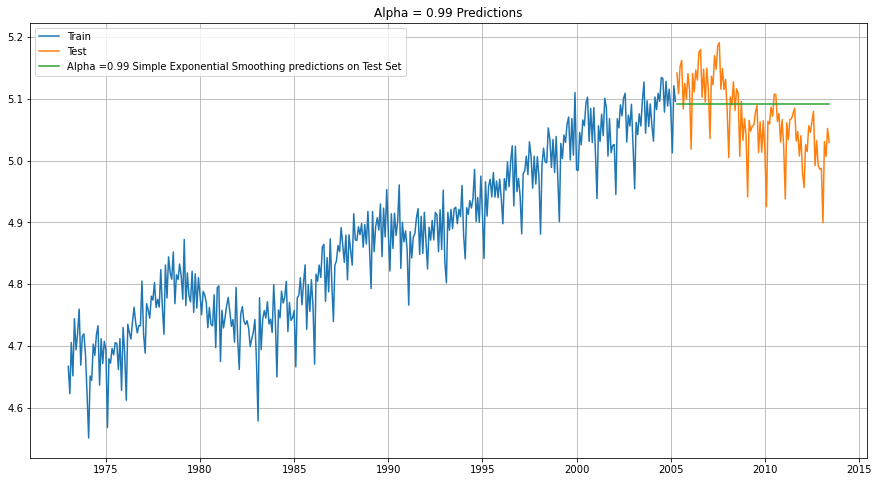

In [102]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha =0.99 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.99 Predictions');

In [103]:
print('SES RMSE:',mean_squared_error(test.values,SES_predict.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(test.values,SES_predict.values)[0])

SES RMSE: 0.0629535706792326
SES RMSE (calculated using statsmodels): 0.06295357067923261


In [89]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(test))
DES_predict


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.11357350489454855, 'smoothing_trend': 0.11357350489454855, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 108.744467948713, 'initial_trend': -0.12974417221607415, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\nswam\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


2005-05-01    165.035087
2005-06-01    165.270090
2005-07-01    165.505093
2005-08-01    165.740097
2005-09-01    165.975100
                 ...    
2013-02-01    186.890398
2013-03-01    187.125401
2013-04-01    187.360404
2013-05-01    187.595408
2013-06-01    187.830411
Freq: MS, Length: 98, dtype: float64

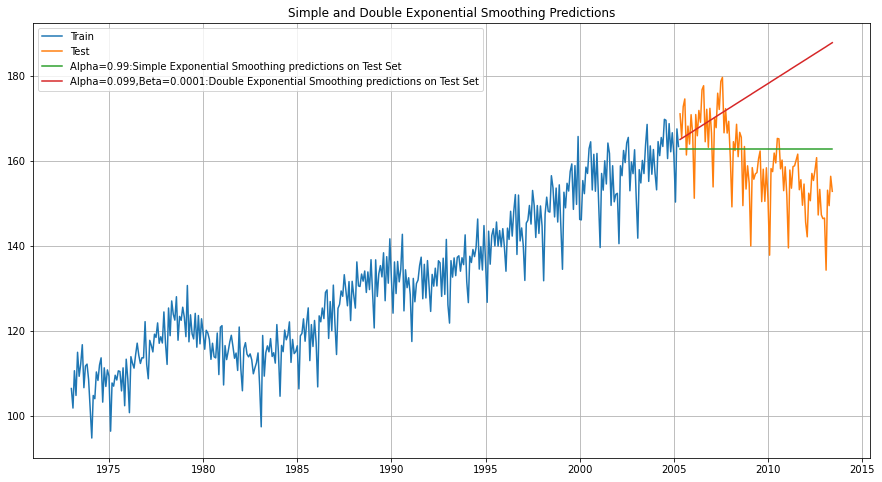

In [90]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.99:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.099,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

In [91]:
print('DES RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))

DES RMSE: 22.404013591442695


In [54]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)

# Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(test))
TES_predict

C:\Users\nswam\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.3877751169613204, 'smoothing_trend': 6.525360200083334e-11, 'smoothing_seasonal': 1.0174132537458722e-11, 'damping_trend': nan, 'initial_level': 108.72517800230577, 'initial_trend': 0.12967981984596355, 'initial_seasons': array([-2.04719949, -8.66545951,  2.31385083, -2.08511108,  2.20167192,
        0.78393097,  1.80332274,  4.26874945, -3.01657837,  1.79441081,
       -1.47215687,  3.55646757]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


1980-01-01    117.699575
1980-02-01    111.210995
1980-03-01    122.319985
1980-04-01    118.050703
1980-05-01    122.467165
                 ...    
2013-02-01    162.564203
2013-03-01    173.673193
2013-04-01    169.403911
2013-05-01    173.820374
2013-06-01    172.532313
Freq: MS, Length: 402, dtype: float64

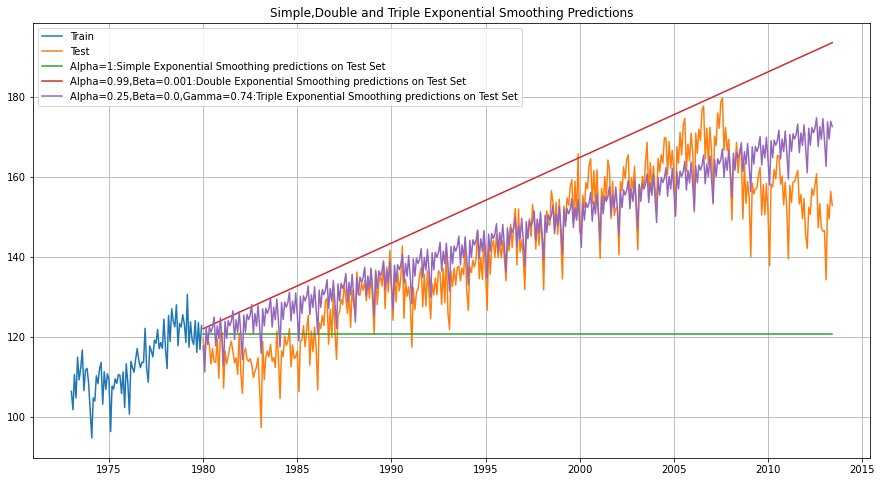

In [55]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [56]:
print('TES RMSE:',mean_squared_error(test.values,TES_predict.values,squared=False))

TES RMSE: 8.351926624423468


In [58]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(train,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.39701043660966895, 'smoothing_trend': 0.0, 'smoothing_seasonal': 0.0, 'damping_trend': nan, 'initial_level': 97.49535986049227, 'initial_trend': 0.11872721958051481, 'initial_seasons': array([1.09319832, 1.02940113, 1.1375187 , 1.09220573, 1.13442819,
       1.12037534, 1.12955881, 1.15450233, 1.08341078, 1.13013618,
       1.09889172, 1.14727394]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\nswam\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [59]:
# Forecasting using this model for the duration of the test set
TES_predict_am =  model_TES_am.forecast(len(test))
TES_predict_am

1980-01-01    117.560745
1980-02-01    110.822318
1980-03-01    122.596995
1980-04-01    117.843027
1980-05-01    122.533287
                 ...    
2013-02-01    159.220620
2013-03-01    176.078550
2013-04-01    169.194149
2013-05-01    175.869538
2013-06-01    173.823955
Freq: MS, Length: 402, dtype: float64

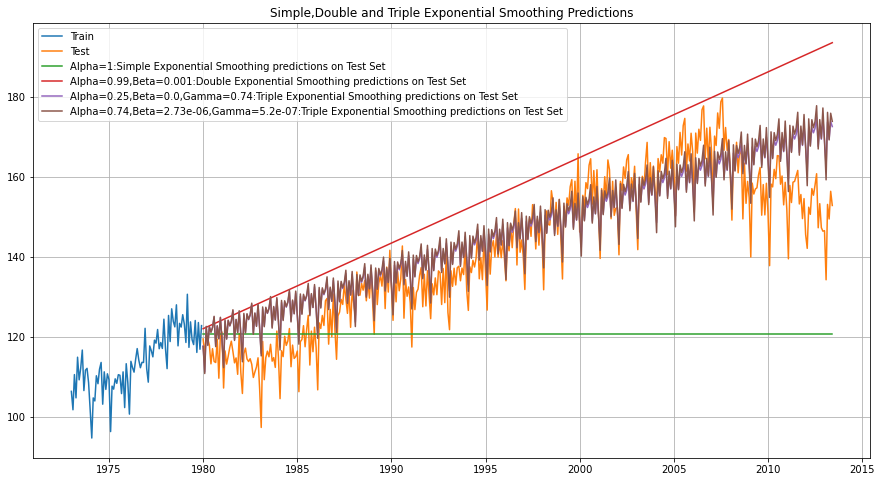

In [60]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am, label='Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [61]:
print('TES_am RMSE:',mean_squared_error(test.values,TES_predict_am.values,squared=False))

TES_am RMSE: 8.415227135486075
